In [298]:
import pandas as pd
import matplotlib.pyplot as plt

In [299]:
data = pd.read_csv('train.csv', na_values='?')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [300]:
data['Cabin'] = data['Cabin'].replace(to_replace='T', value='A')
data['Deck'] = data['Cabin'].str[0].fillna('M')

# Group the decks based on their first letter
deck_map = {'A': 'ABC', 'B': 'ABC', 'C': 'ABC', 'D': 'DE', 'E': 'DE', 'F': 'FG', 'G': 'FG', 'M': 'M'}
data['Deck'] = data['Deck'].map(deck_map)

# Print the count of each deck
print(data['Deck'].value_counts())

M      687
ABC    122
DE      65
FG      17
Name: Deck, dtype: int64


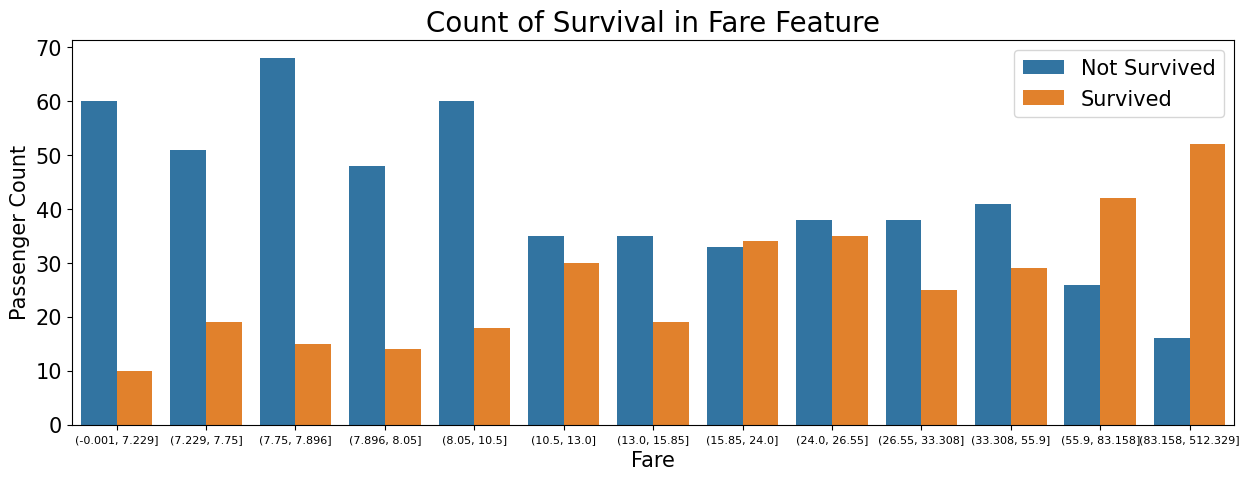

In [301]:
import seaborn as sns

data['Fare_bin'] = pd.qcut(data['Fare'], 13)

fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x='Fare_bin', hue='Survived', data=data)

plt.xlabel('Fare', size=15 )
plt.ylabel('Passenger Count', size=15)
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], prop={'size': 15})
plt.title('Count of Survival in Fare Feature',size=20)

plt.show()

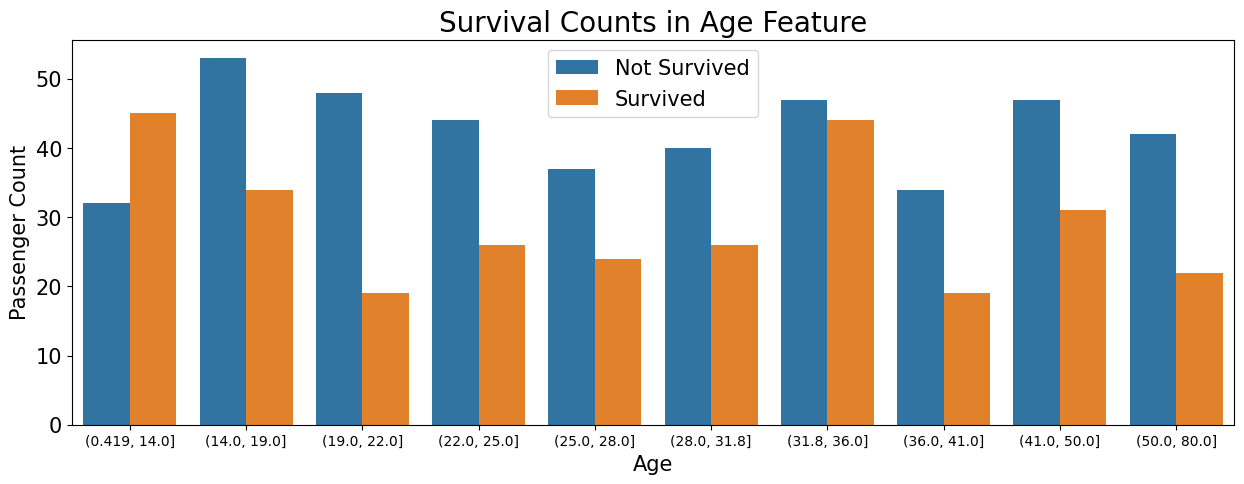

In [302]:
data['Age_bin'] = pd.qcut(data['Age'], 10)

fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x='Age_bin', hue='Survived', data=data)

plt.xlabel('Age', size=15)
plt.ylabel('Passenger Count', size=15)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], prop={'size': 15})
plt.title('Survival Counts in Age Feature',size=20)

plt.show()

In [303]:
data['Family_Size'] = data['SibSp'] + data['Parch'] + 1
def label_family_size(size):
    if size == 1:
        return 'Alone'
    elif 2 <= size <= 4:
        return 'Small'
    elif 5 <= size <= 6:
        return 'Medium'
    else:
        return 'Large'
data['Family_Size'] = data['Family_Size'].apply(label_family_size)

In [304]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Fare_bin,Age_bin,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,M,"(7.229, 7.75]","(19.0, 22.0]",Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,ABC,"(55.9, 83.158]","(36.0, 41.0]",Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,M,"(7.896, 8.05]","(25.0, 28.0]",Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,ABC,"(33.308, 55.9]","(31.8, 36.0]",Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,M,"(7.896, 8.05]","(31.8, 36.0]",Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,M,"(10.5, 13.0]","(25.0, 28.0]",Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,ABC,"(26.55, 33.308]","(14.0, 19.0]",Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,M,"(15.85, 24.0]",NaN,Small
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,ABC,"(26.55, 33.308]","(25.0, 28.0]",Alone


Text(0, 0.5, '')

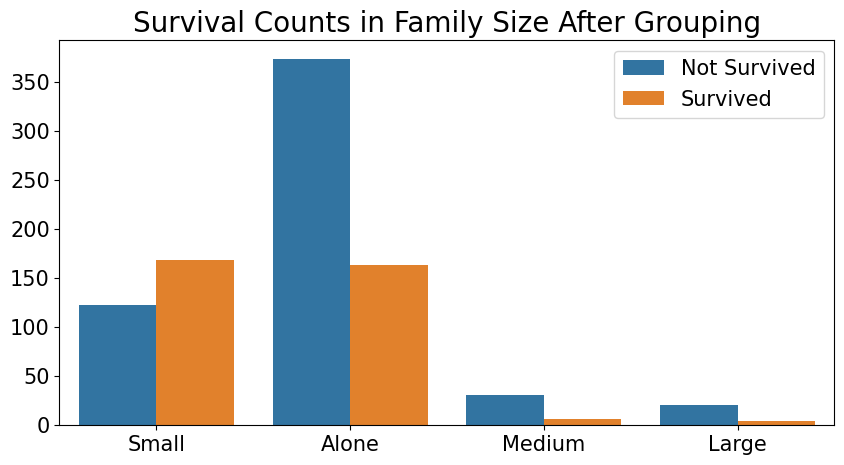

In [305]:
fig, axs = plt.subplots(figsize=(10, 5))
sns.countplot(x='Family_Size', hue='Survived', data=data)
axs.set_title('Survival Counts in Family Size After Grouping', size=20)
plt.legend(['Not Survived', 'Survived'], prop={'size': 15})
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
axs.set_xlabel('')
axs.set_ylabel('')


Text(0, 0.5, '')

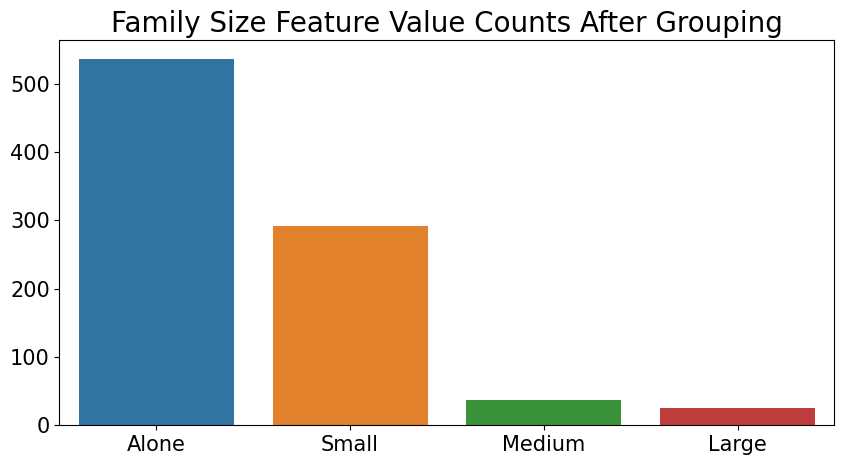

In [306]:
fig, axs = plt.subplots(figsize=(10, 5))
sns.barplot(x=data['Family_Size'].value_counts().index, y=data['Family_Size'].value_counts().values)
axs.set_title('Family Size Feature Value Counts After Grouping', size=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
axs.set_xlabel('')
axs.set_ylabel('')


In [307]:
data['Ticket_Frequency'] = data.groupby('Ticket')['Ticket'].transform('count')

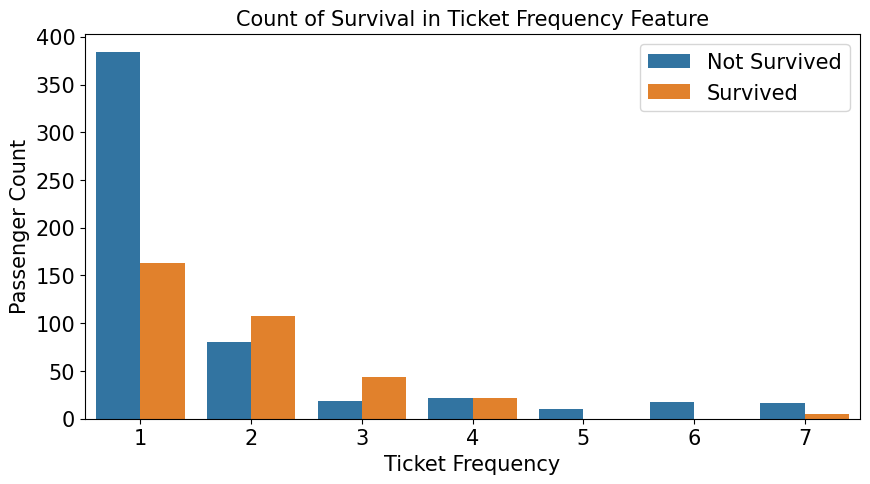

In [308]:
fig, axs = plt.subplots(figsize=(10, 5))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=data)

plt.xlabel('Ticket Frequency', size=15)
plt.ylabel('Passenger Count', size=15)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], prop={'size': 15})
plt.title('Count of Survival in Ticket Frequency Feature', size=15)

plt.show()

In [309]:
data['Title'] = data['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
data['Is_Married'] = 0
data['Is_Married'].loc[data['Title'] == 'Mrs'] = 1

data['Title'] = data['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
data['Title'] = data['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

C:\Temp\ipykernel_8536\2586955962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Is_Married'].loc[data['Title'] == 'Mrs'] = 1


Text(0, 0.5, '')

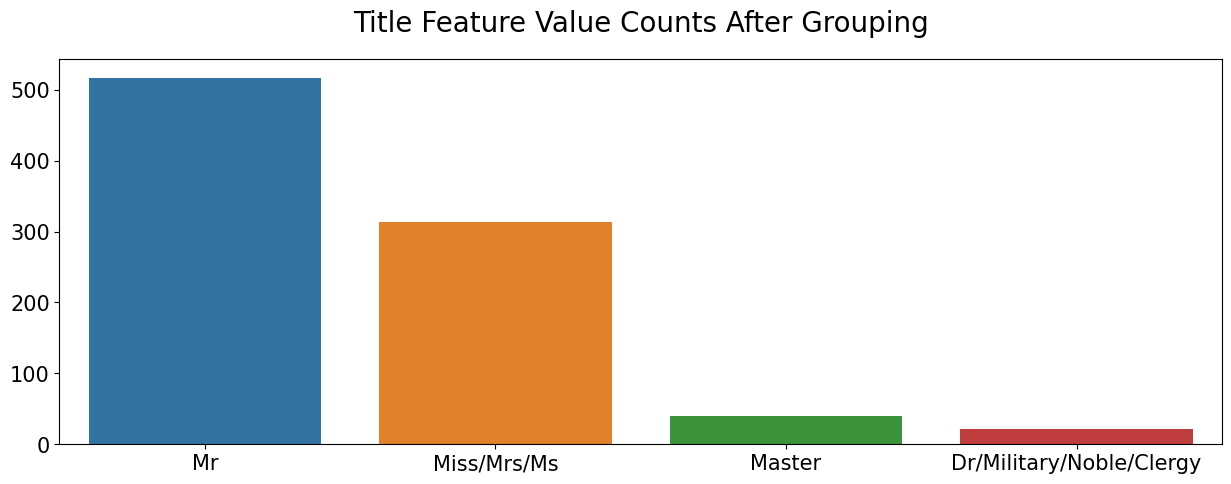

In [310]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.barplot(x=data['Title'].value_counts().index, y=data['Title'].value_counts().values)
axs.set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
axs.set_xlabel('')
axs.set_ylabel('')


In [311]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Fare_bin,Age_bin,Family_Size,Ticket_Frequency,Title,Is_Married
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,M,"(7.229, 7.75]","(19.0, 22.0]",Small,1,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,ABC,"(55.9, 83.158]","(36.0, 41.0]",Small,1,Miss/Mrs/Ms,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,M,"(7.896, 8.05]","(25.0, 28.0]",Alone,1,Miss/Mrs/Ms,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,ABC,"(33.308, 55.9]","(31.8, 36.0]",Small,2,Miss/Mrs/Ms,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,M,"(7.896, 8.05]","(31.8, 36.0]",Alone,1,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,M,"(10.5, 13.0]","(25.0, 28.0]",Alone,1,Dr/Military/Noble/Clergy,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,ABC,"(26.55, 33.308]","(14.0, 19.0]",Alone,1,Miss/Mrs/Ms,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,M,"(15.85, 24.0]",NaN,Small,2,Miss/Mrs/Ms,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,ABC,"(26.55, 33.308]","(25.0, 28.0]",Alone,1,Mr,0


In [312]:
data = data.set_index('PassengerId')

In [313]:
data['Sex'] = data['Sex'].replace(to_replace='male', value=1)
data['Sex'] = data['Sex'].replace(to_replace='female', value=0)

In [314]:
data['Deck'] = data['Deck'].replace(to_replace='M', value=0)
data['Deck'] = data['Deck'].replace(to_replace='ABC', value=1)
data['Deck'] = data['Deck'].replace(to_replace='DE', value=2)
data['Deck'] = data['Deck'].replace(to_replace='FG', value=3)

In [315]:
data['Title'] = data['Title'].replace(to_replace='Mr', value=0)
data['Title'] = data['Title'].replace(to_replace='Miss/Mrs/Ms', value=1)
data['Title'] = data['Title'].replace(to_replace='Dr/Military/Noble/Clergy', value=2)
data['Title'] = data['Title'].replace(to_replace='Master', value=3)

In [316]:
data['Family_Size'] = data['Family_Size'].replace(to_replace='Alone', value=0)
data['Family_Size'] = data['Family_Size'].replace(to_replace='Small', value=1)
data['Family_Size'] = data['Family_Size'].replace(to_replace='Medium', value=2)
data['Family_Size'] = data['Family_Size'].replace(to_replace='Large', value=3)

In [317]:
data.drop(columns='Cabin',inplace=True)
data.drop(columns='Embarked',inplace=True)
data.drop(columns='Name',inplace=True)
data.drop(columns='Ticket',inplace=True)

In [319]:
data=data.dropna()
X = data.drop(columns=['Survived','Fare_bin','Age_bin'])
y = data['Survived']

In [318]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Deck,Fare_bin,Age_bin,Family_Size,Ticket_Frequency,Title,Is_Married
PassengerId,,,,,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0,"(7.229, 7.75]","(19.0, 22.0]",1,1,0,0
2,1,1,0,38.0,1,0,71.2833,1,"(55.9, 83.158]","(36.0, 41.0]",1,1,1,1
3,1,3,0,26.0,0,0,7.9250,0,"(7.896, 8.05]","(25.0, 28.0]",0,1,1,0
4,1,1,0,35.0,1,0,53.1000,1,"(33.308, 55.9]","(31.8, 36.0]",1,2,1,1
5,0,3,1,35.0,0,0,8.0500,0,"(7.896, 8.05]","(31.8, 36.0]",0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,0,"(10.5, 13.0]","(25.0, 28.0]",0,1,2,0
888,1,1,0,19.0,0,0,30.0000,1,"(26.55, 33.308]","(14.0, 19.0]",0,1,1,0
889,0,3,0,NaN,1,2,23.4500,0,"(15.85, 24.0]",NaN,1,2,1,0


In [320]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Deck,Family_Size,Ticket_Frequency,Title,Is_Married
PassengerId,,,,,,,,,,,
1,3,1,22.0,1,0,7.2500,0,1,1,0,0
2,1,0,38.0,1,0,71.2833,1,1,1,1,1
3,3,0,26.0,0,0,7.9250,0,0,1,1,0
4,1,0,35.0,1,0,53.1000,1,1,2,1,1
5,3,1,35.0,0,0,8.0500,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,3,0,39.0,0,5,29.1250,0,2,5,1,1
887,2,1,27.0,0,0,13.0000,0,0,1,2,0
888,1,0,19.0,0,0,30.0000,1,0,1,1,0


Accuracy train: 0.9937238493723849
Accuracy test: 0.8135593220338984


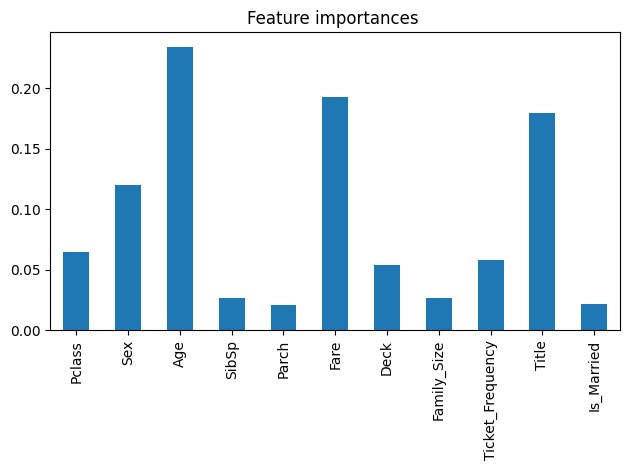

In [324]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.67, random_state=42)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
y_train_pred=model.predict(X_train)
print("Accuracy train:",metrics.accuracy_score(y_train, y_train_pred))
y_test_pred=model.predict(X_test)
print("Accuracy test:",metrics.accuracy_score(y_test, y_test_pred))
importances = model.feature_importances_
feature_names = X_test.columns
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances ")
fig.tight_layout()